In [46]:
!pip install --upgrade pip
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 851.0 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3
    Uninstalling pip-23.3:
      Successfully uninstalled pip-23.3
Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.12.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 931.5 kB/s eta 0:00:0000:0100:02


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [18]:
df = pd.read_csv('results.csv')
sizes = df['Size'].unique()

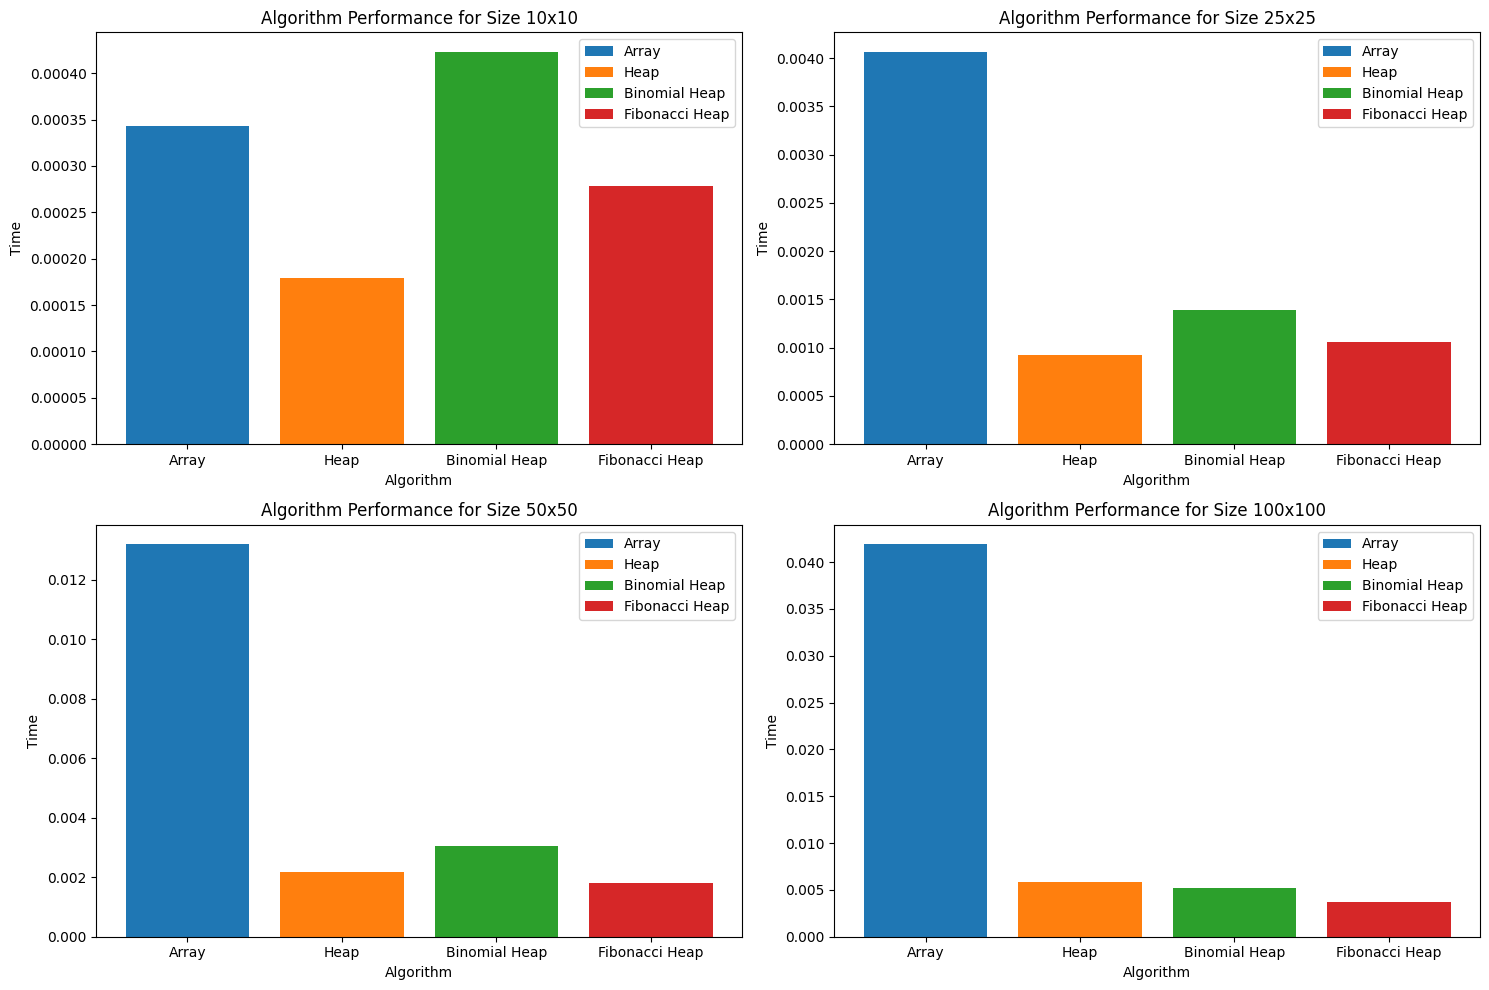

In [19]:
sizes = df['Size'].unique()

# Create a single figure for all bar plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, size in enumerate(sizes):
    # Select the current axis
    ax = axes[i]

    # Filter data for the current size
    size_data = df[df['Size'] == size]

    for algorithm in size_data['Algorithm'].unique():
        algorithm_data = size_data[size_data['Algorithm'] == algorithm]
        ax.bar(algorithm_data['Algorithm'], algorithm_data['Time'], label=algorithm)

    ax.set_xlabel('Algorithm')
    ax.set_ylabel('Time')
    ax.set_title(f'Algorithm Performance for Size {size}')
    ax.legend()

# Adjust layout and show the combined figure
plt.tight_layout()
plt.show()

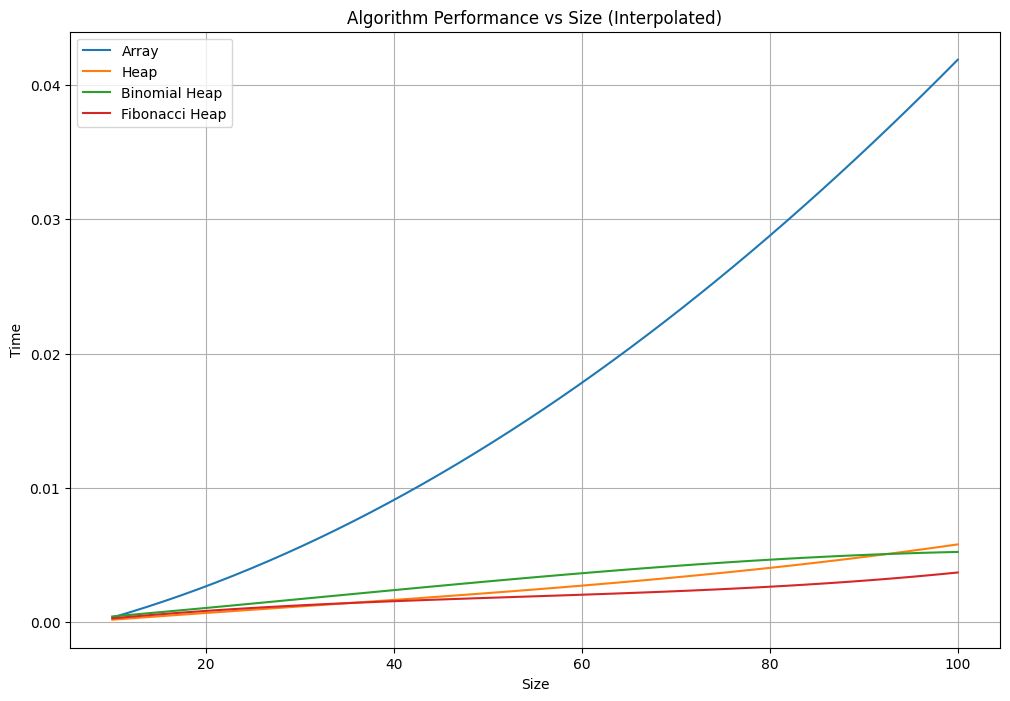

In [64]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 8))

algorithms = df['Algorithm'].unique()

for algorithm in algorithms:
    algorithm_data = df[df['Algorithm'] == algorithm]
    
    algorithm_data['Size'] = algorithm_data['Size'].str.extract('(\d+)').astype(float)
    
    f = interp1d(algorithm_data['Size'], algorithm_data['Time'], kind='cubic')
    
    x_smooth = np.linspace(algorithm_data['Size'].min(), algorithm_data['Size'].max(), 50)
    y_smooth = f(x_smooth)
    
    plt.plot(x_smooth, y_smooth, label=algorithm, linestyle='-')

plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Algorithm Performance vs Size (Interpolated)')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
data = {
    'Operation': ['insert', 'find-min', 'delete', 'decrease-key', 'union'],
    'Binary Heap': ['O(log N)', 'O(1)', 'O(log N)', 'O(log N)', 'O(N)'],
    'Binomial Heap': ['O(log N)', 'O(log N)', 'O(log N)', 'O(log N)', 'O(log N)'],
    'Fibonacci Heap': ['O(1)', 'O(1)', 'O(log N)', 'O(1)', 'O(1)'],
}

df = pd.DataFrame(data)
df

,Operation,Binary Heap,Binomial Heap,Fibonacci Heap
0,insert,O(log N),O(log N),O(1)
1,find-min,O(1),O(log N),O(1)
2,delete,O(log N),O(log N),O(log N)
3,decrease-key,O(log N),O(log N),O(1)
4,union,O(N),O(log N),O(1)


In [22]:
import glob
from IPython.display import Image, display

Image Name: binomial-heap.jpeg



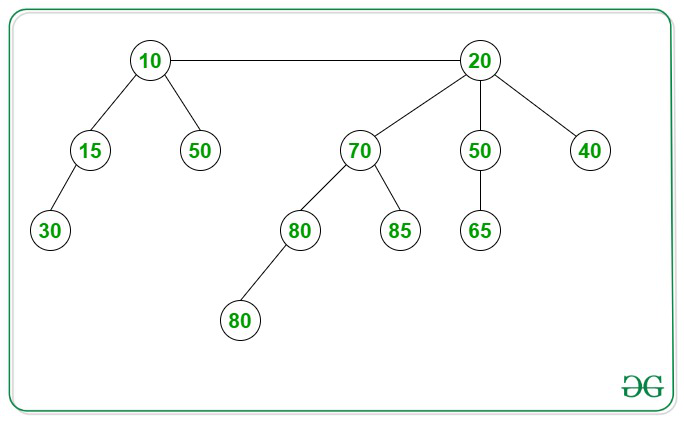

A Binomial Heap is a collection of Binomial Tree where each Binomial Tree follows the Min-Heap 
        property and there can be at most one Binomial Tree of any degree. The key difference between a 
        Binary Heap and a Binomial Heap is how the heaps are structured. In a Binary Heap, the heap is 
        a single tree, which is a complete binary tree. In a Binomial Heap, the heap is a collection of 
        smaller trees (that is, a forest of trees), each of which is a binomial tree. A complete binary 
        tree can be built to hold any number of elements, but the number of elements in a binomial tree 
        of some order N is always 2*N. Consequently, one complete binary tree is needed to back a Binary Heap, 
        but we may need multiple binomial trees to back a Binomial Heap.
Image Name: fibonacci-heap.jpeg



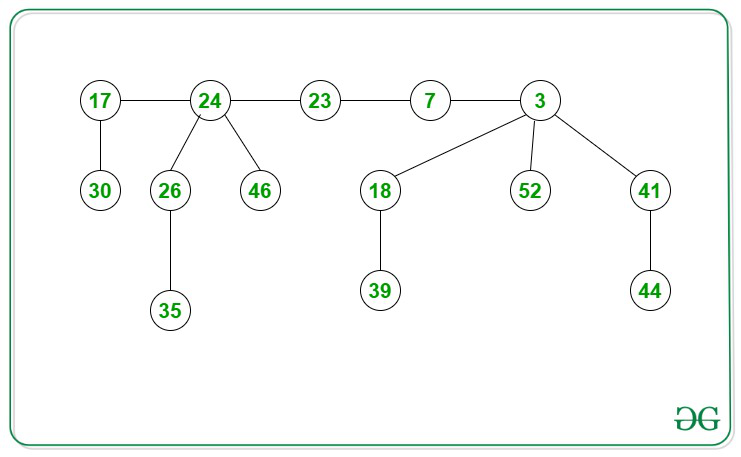

Like Binomial Heap, Fibonacci Heap is a collection of trees with Min-Heap or Max-Heap property. 
        In Fibonacci Heap, trees can have any shape even all trees can be single nodes (This is unlike Binomial 
        Heap where every tree has to be a Binomial Tree). Fibonacci Heap maintains a pointer to a minimum value 
        (which is the root of a tree). All tree roots are connected using a circular doubly linked list, 
        so all of them can be accessed using a single ‘min’ pointer.
Image Name: binary-heap.jpeg



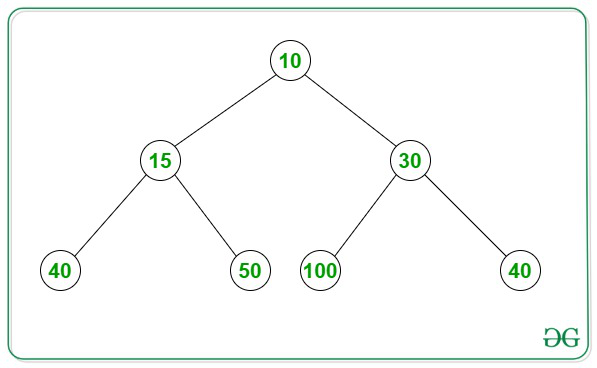

It’s a complete binary tree i.e., all levels are completely filled except possibly the last level 
        and the last level has all keys as left as possible. This property of Binary Heap makes them suitable 
        to be stored in an array. A Binary Heap is either Min Heap or Max Heap. In a Min Binary Heap, the key 
        at root must be minimum among all keys present in Binary Heap. The same property must be recursively 
        true for all nodes in Binary Tree. Max Binary Heap is similar to Min Heap.


In [69]:
image_folder_path = 'heaps'

docs = ["""A Binomial Heap is a collection of Binomial Tree where each Binomial Tree follows the Min-Heap 
        property and there can be at most one Binomial Tree of any degree. The key difference between a 
        Binary Heap and a Binomial Heap is how the heaps are structured. In a Binary Heap, the heap is 
        a single tree, which is a complete binary tree. In a Binomial Heap, the heap is a collection of 
        smaller trees (that is, a forest of trees), each of which is a binomial tree. A complete binary 
        tree can be built to hold any number of elements, but the number of elements in a binomial tree 
        of some order N is always 2*N. Consequently, one complete binary tree is needed to back a Binary Heap, 
        but we may need multiple binomial trees to back a Binomial Heap.\n""" ,
        """Like Binomial Heap, Fibonacci Heap is a collection of trees with Min-Heap or Max-Heap property. 
        In Fibonacci Heap, trees can have any shape even all trees can be single nodes (This is unlike Binomial 
        Heap where every tree has to be a Binomial Tree). Fibonacci Heap maintains a pointer to a minimum value 
        (which is the root of a tree). All tree roots are connected using a circular doubly linked list, 
        so all of them can be accessed using a single ‘min’ pointer.\n""",
        """It’s a complete binary tree i.e., all levels are completely filled except possibly the last level 
        and the last level has all keys as left as possible. This property of Binary Heap makes them suitable 
        to be stored in an array. A Binary Heap is either Min Heap or Max Heap. In a Min Binary Heap, the key 
        at root must be minimum among all keys present in Binary Heap. The same property must be recursively 
        true for all nodes in Binary Tree. Max Binary Heap is similar to Min Heap.\n"""]
image_files = glob.glob(image_folder_path + '/*.jpeg') 

for index, image_path in enumerate(image_files):
    image_name = image_path.split('/')[-1]
    print(f"Image Name: {image_name}\n")
    display(Image(filename=image_path, embed=True, width=500, height=500))
    print(docs[index])